In [66]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# load and show the dataset
df_org = pd.read_csv("/content/water_potability.csv")
df_org.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [68]:
# Create a copy of dataframe
df = df_org.copy()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [69]:
# Get the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [70]:
# Check for the null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [71]:
# Get describtion of dataframe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [72]:
# Feature and target split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [73]:
# Check the distribution of target
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

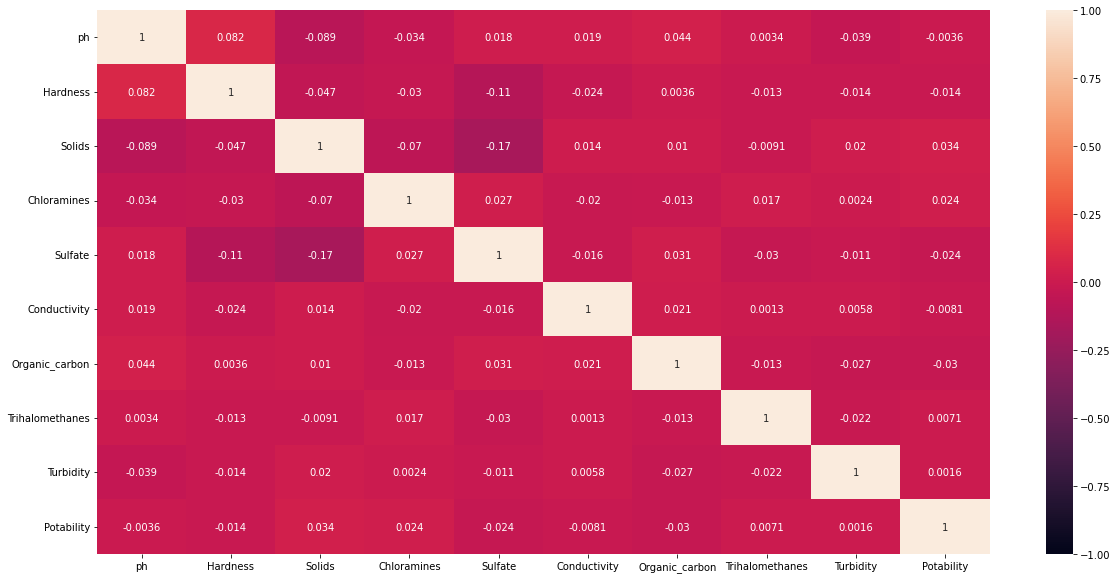

In [74]:
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [75]:
def visulaize_null(df):
  """This function gives the visulisation of each null feature using kdeplots"""
  print("Trend of the null Values")
  # Extracting features with null values
  feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

  # Iterate through each null feature
  for features in feature_with_na:
    # Creating a copy of dataframe to avoid conflit
    data = df.copy()
    
    # Replacing null values with 1 and non-values 0
    data[features] = np.where(data[features].isnull(), 1, 0)
    
    # Grouping dataframe on the basis feature 
    # and exracting potability values from grouped data
    g = data.groupby(features)['Potability']
    
    # Separating null and non-null values
    null = g.get_group(1)
    NotNull = g.get_group(0)

    # Creating kdeplot for null and non-null values
    fig = plt.figure(figsize=(10,5))
    plt.title(features, fontsize=18)
    sns.kdeplot(null, bw_method=0.3, color = 'green', shade=True, label="Null")
    sns.kdeplot(NotNull, bw_method=0.3, color = 'blue', shade=True, label="NotNull")
    fig.legend()

    # Setting initial values 0
    null = 0
    NotNull = 0

In [76]:
# Create function to fill the null values
def fillnull(df, target):
  """
  This function get the columns with the null values and fill them with mean
  and show the difference between filled values and original values using kdeplot
  """
  print("Difference before and after fill the values")
  # Group the data by Potability
  group_df = df.groupby(by=target)

  # Extracting feature with null values
  feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

  # Iterate through each null feature
  for feature in feature_with_na:
    # Fill the null values using grouped data
    df[feature] = group_df[feature].transform(lambda x: x.fillna(x.mean()))

    # Create histogram for feature column
    plt.figure(figsize=(12, 5))
    plt.title(feature, fontsize=18)
    sns.kdeplot(x=df_org[feature], color='r', label="Original")
    plt.axvline(df_org[feature].mean(), color='r', label="Original Mean")
    sns.kdeplot(x=df[feature], label="Filled")
    plt.axvline(df[feature].mean(), label="Filled Mean")
    plt.legend()
    plt.show()

Trend of the null Values
Difference before and after fill the values


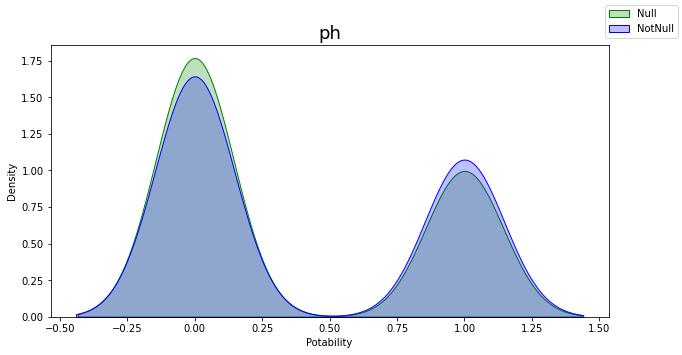

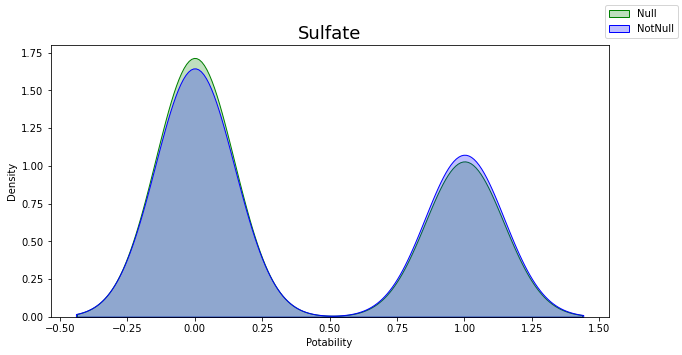

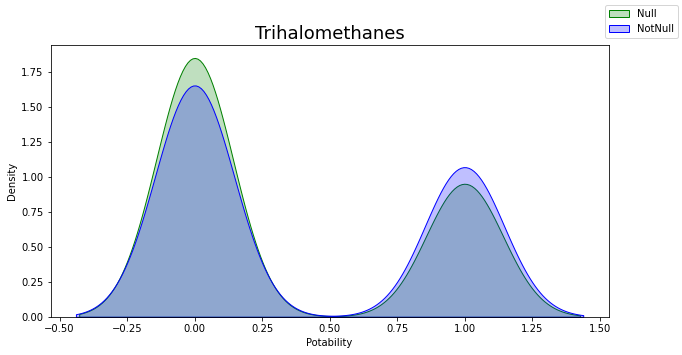

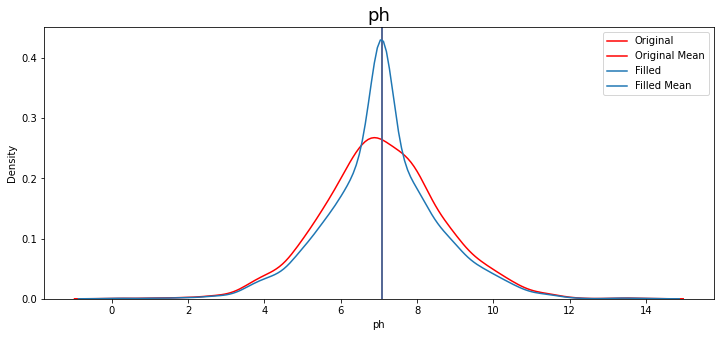

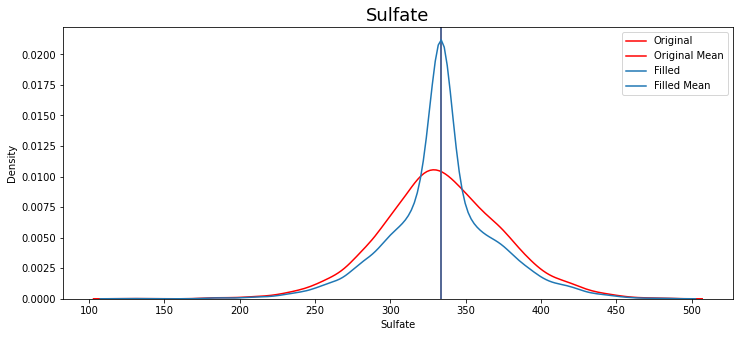

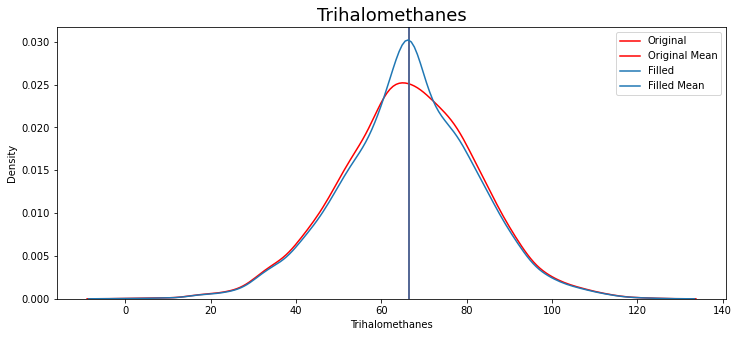

In [77]:
# Run the functions to process everything
visulaize_null(df)
fillnull(df, "Potability")

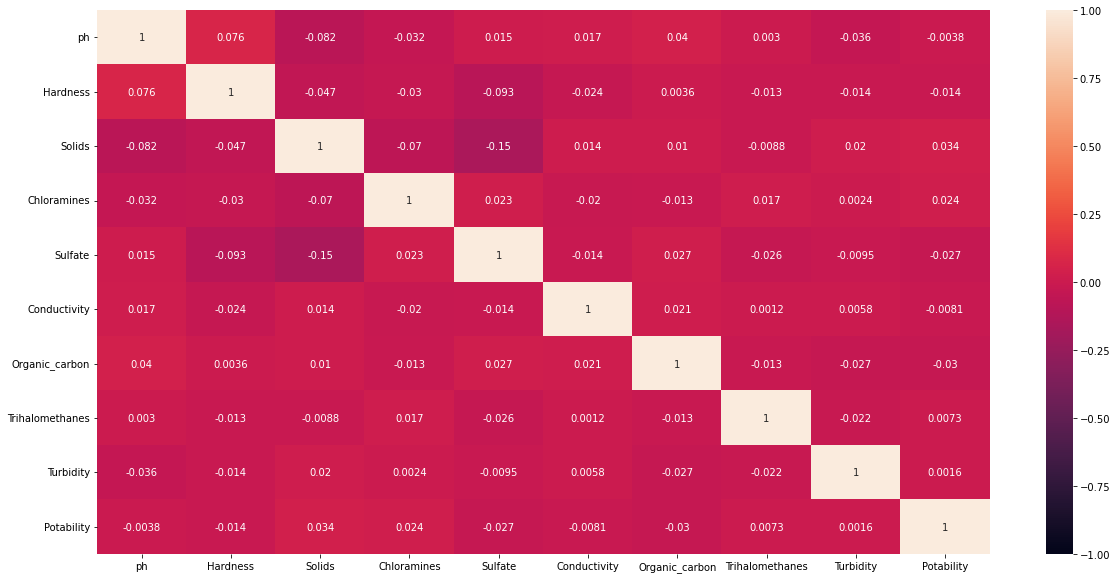

In [78]:
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

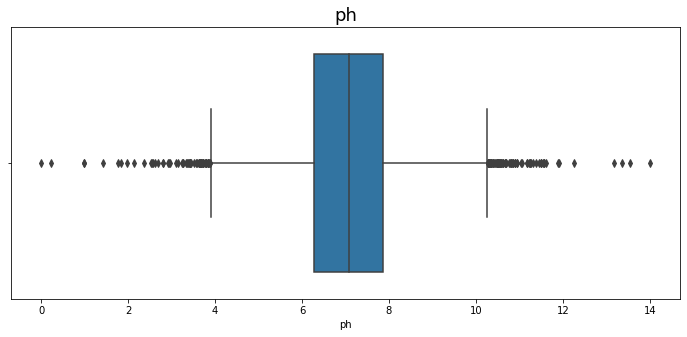

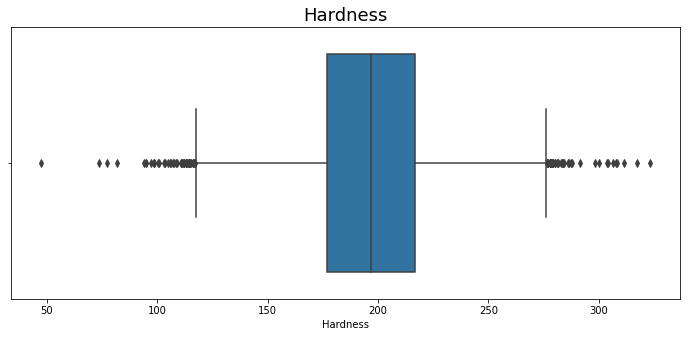

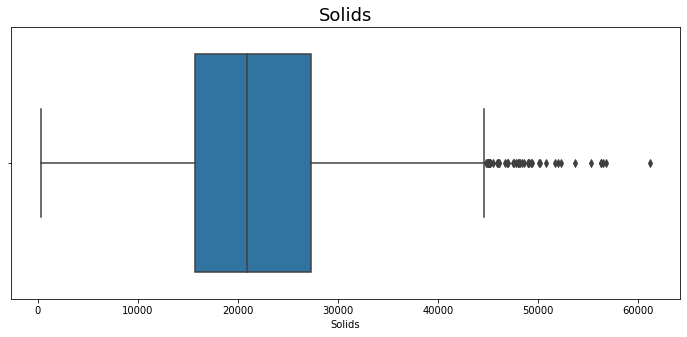

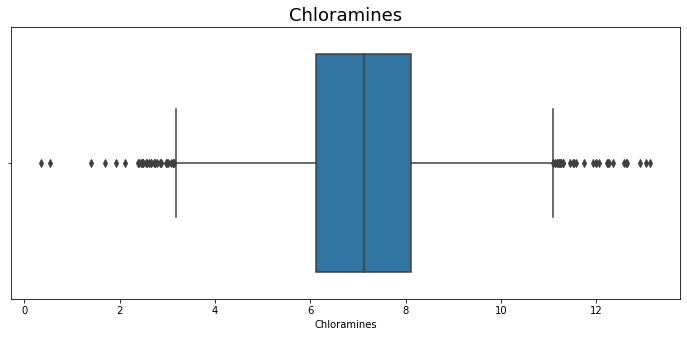

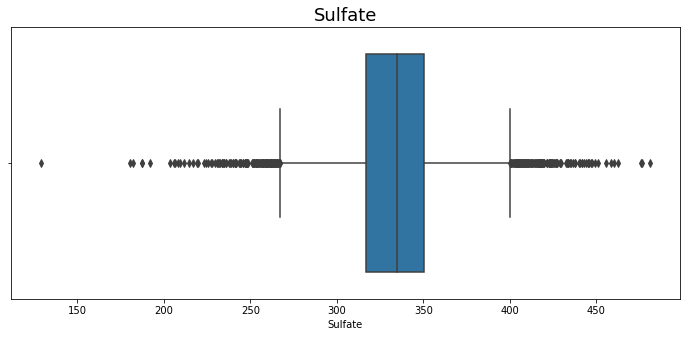

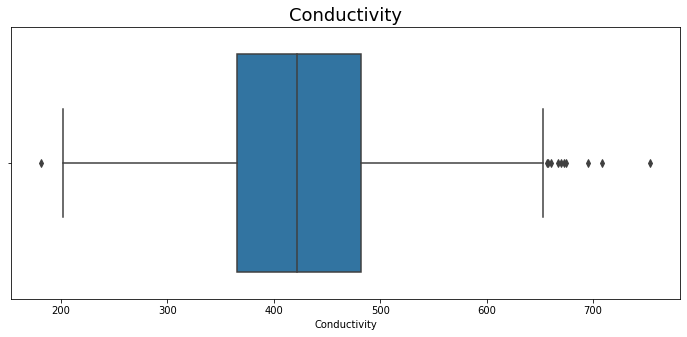

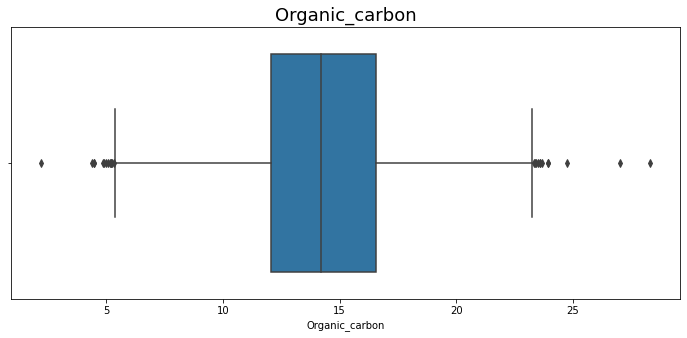

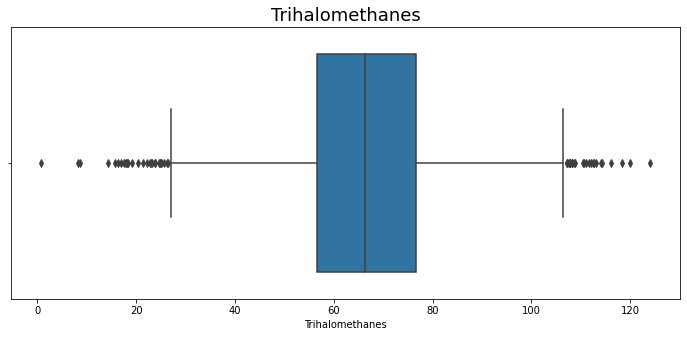

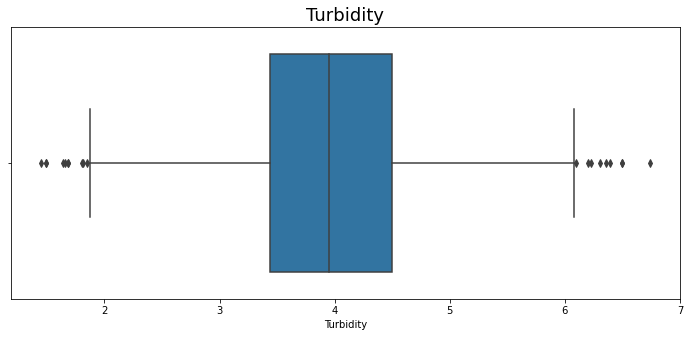

In [79]:
# Create a boxplot for each columns to check the outliers
for feature in x:
  plt.figure(figsize=(12, 5))
  plt.title(feature, fontsize=18)
  sns.boxplot(x=feature, data=df)
  plt.show()

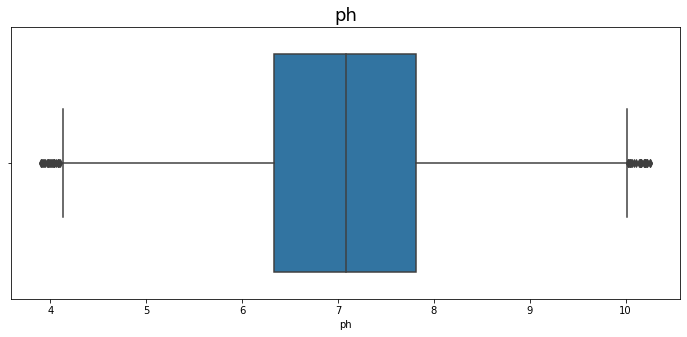

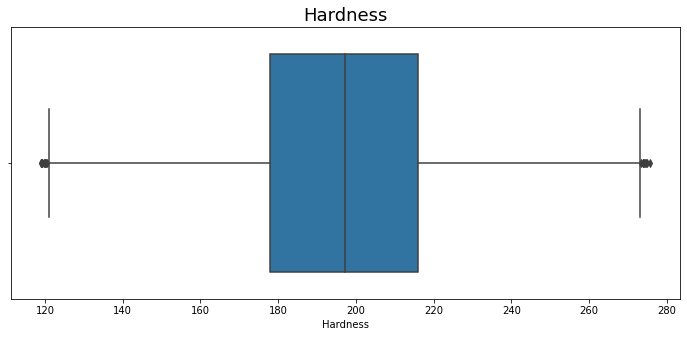

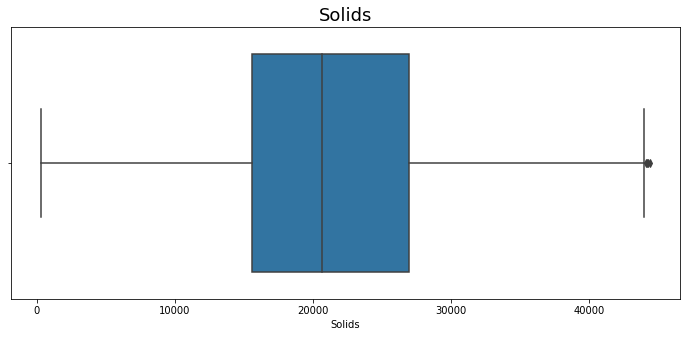

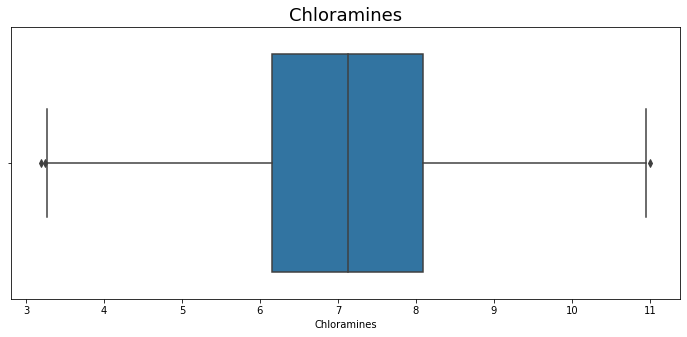

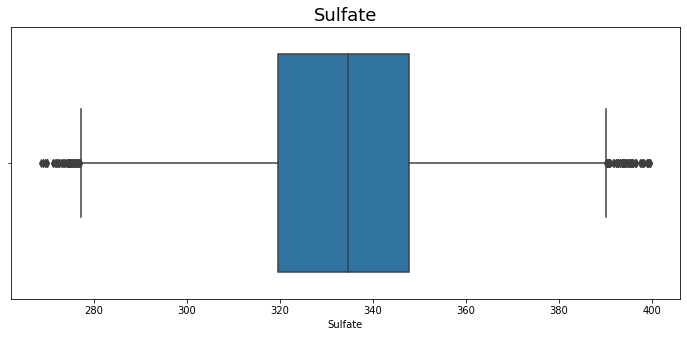

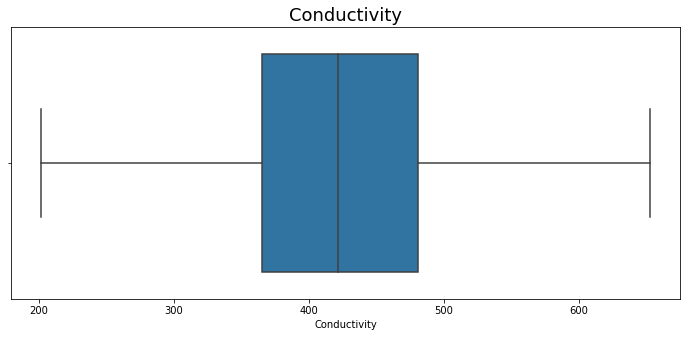

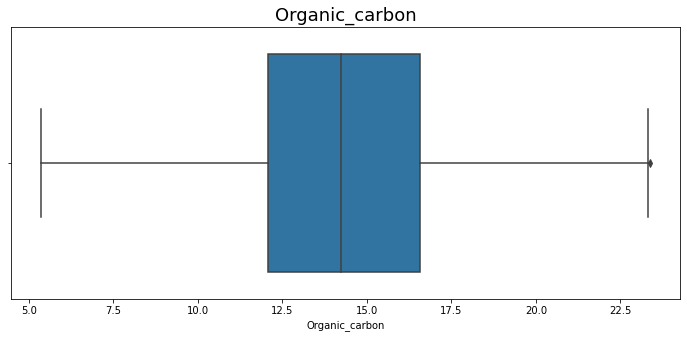

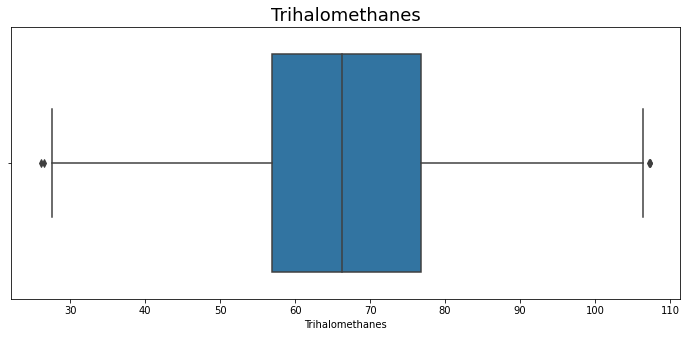

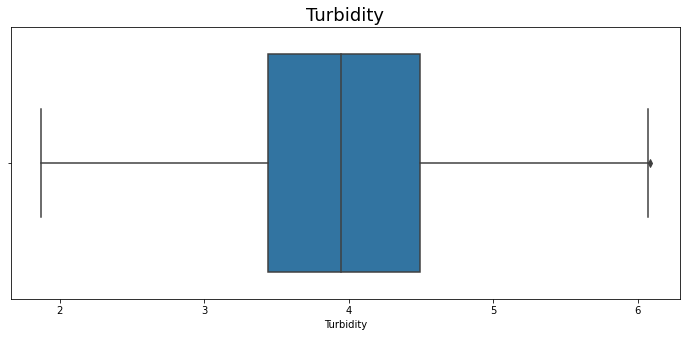

In [80]:
# Create a loop to remove the outliers
for feature in x:
  # Calculate q1, q3 and iqr
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3 - q1

  # Get local minimum and maximum
  local_min = q1 - (1.5 * iqr)
  local_max = q3 + (1.5 * iqr)

  # Remove the outliers
  df = df[(df[feature] >= local_min) & (df[feature] <= local_max)]

  # Create the boxplot
  plt.figure(figsize=(12, 5))
  plt.title(feature, fontsize=18)
  sns.boxplot(x=feature, data=df)
  plt.show()

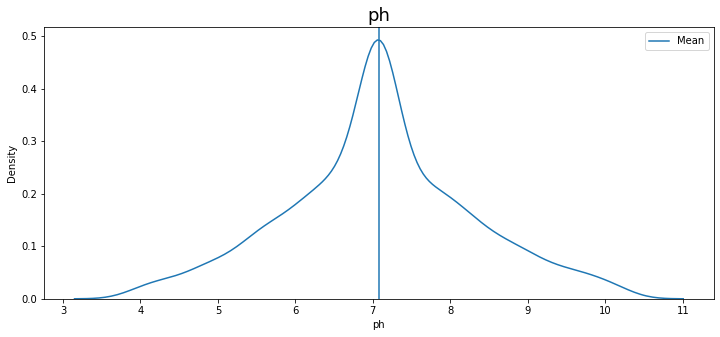

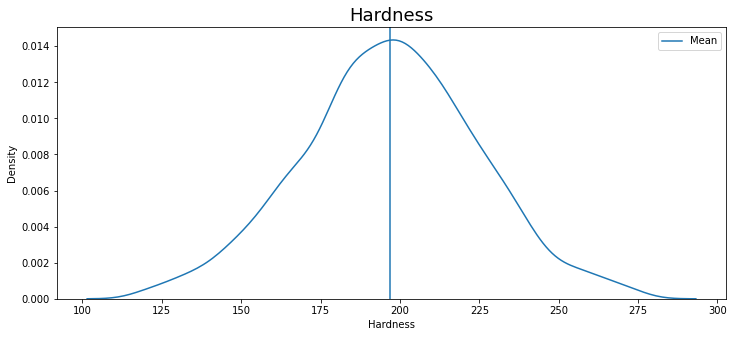

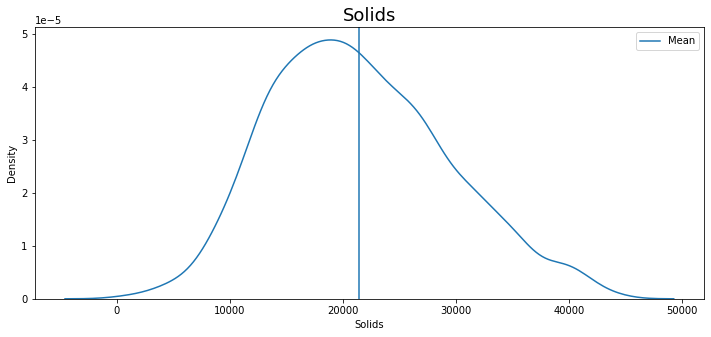

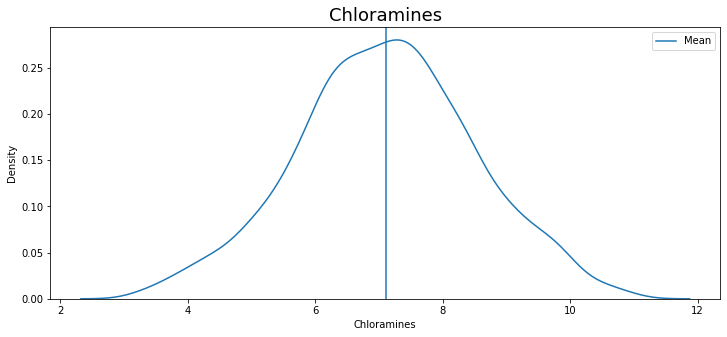

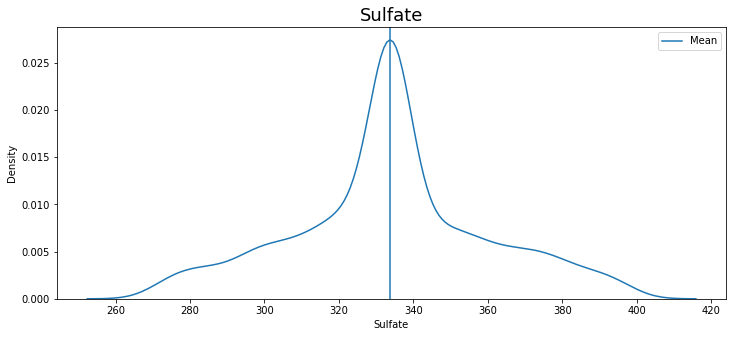

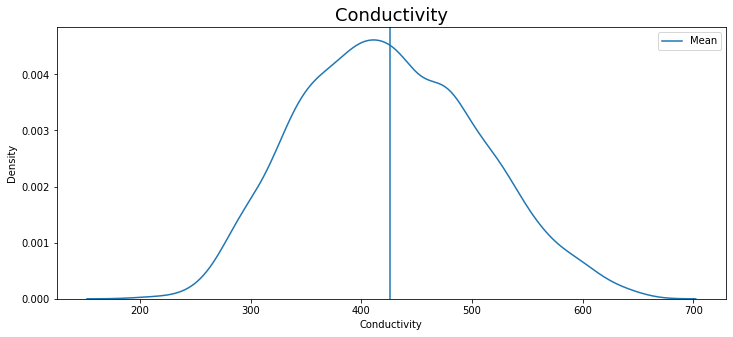

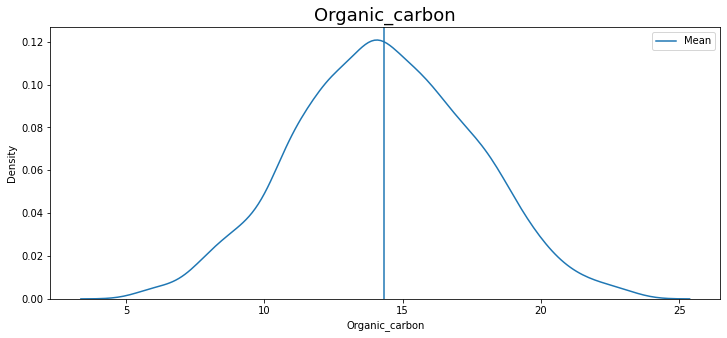

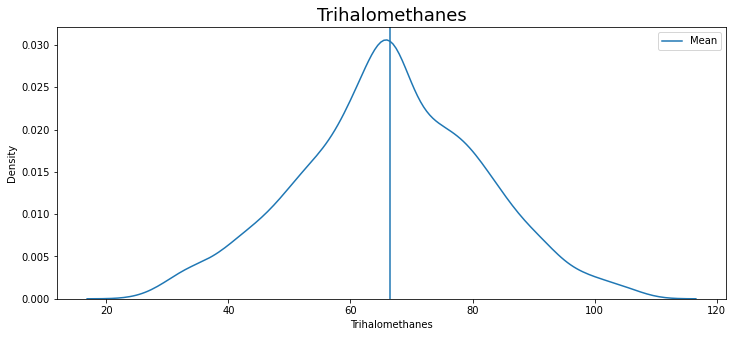

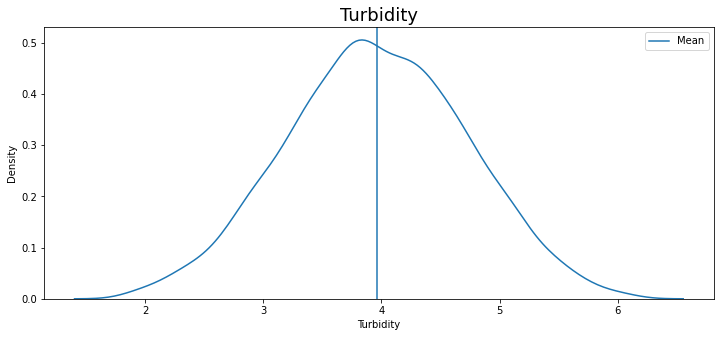

In [87]:
# Check for the normal distribution
for feature in x:
  plt.figure(figsize=(12, 5))
  plt.title(feature, fontsize=18)
  sns.kdeplot(x=df[feature])
  plt.axvline(df[feature].mean(), label="Mean")
  plt.legend()
  plt.show()

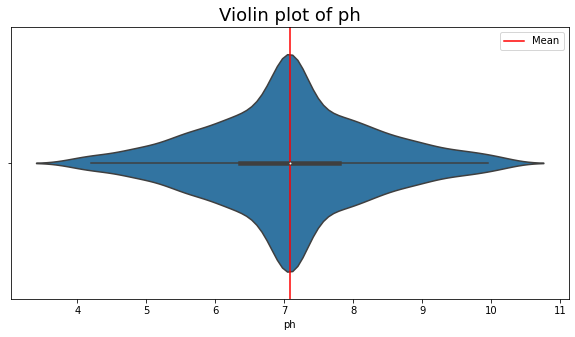

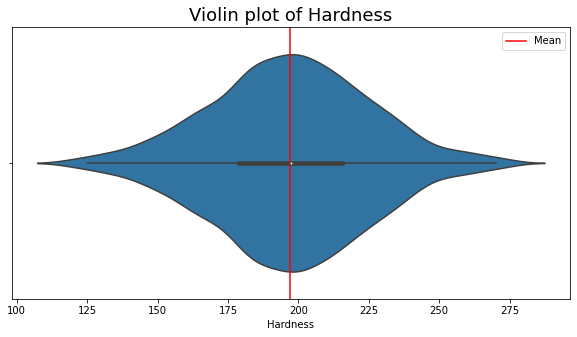

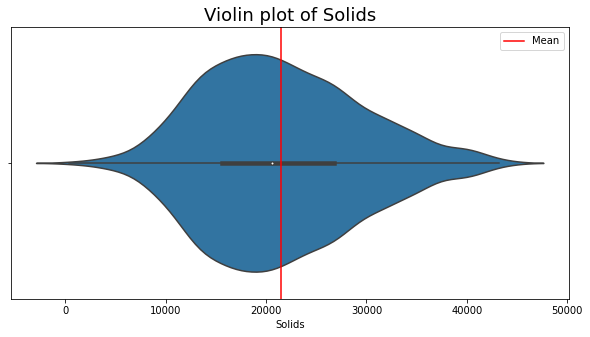

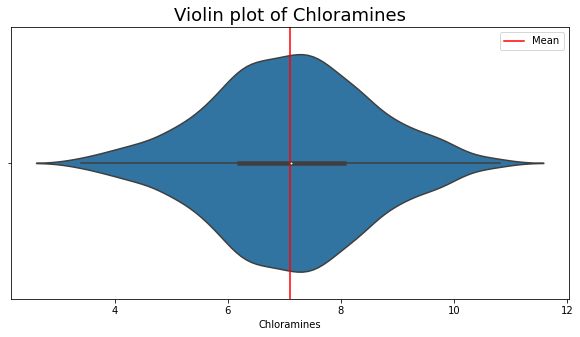

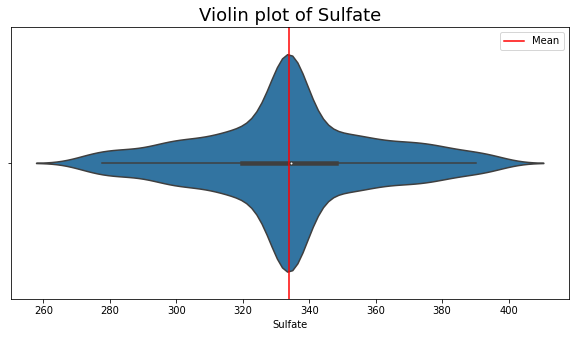

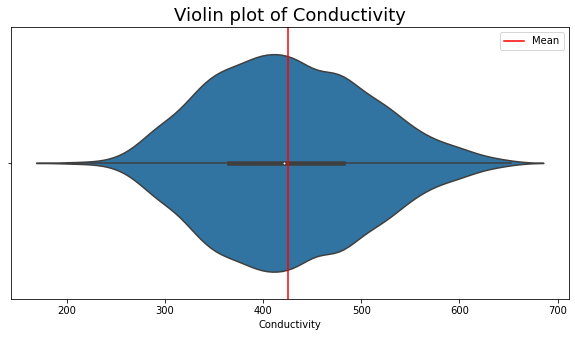

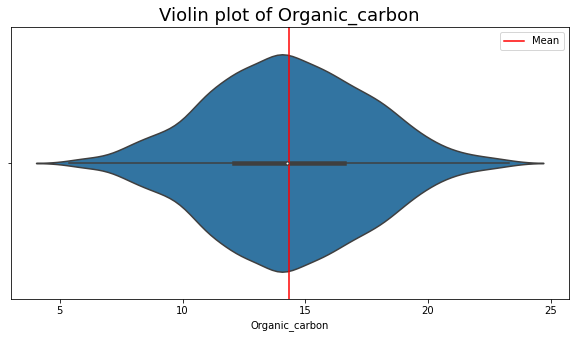

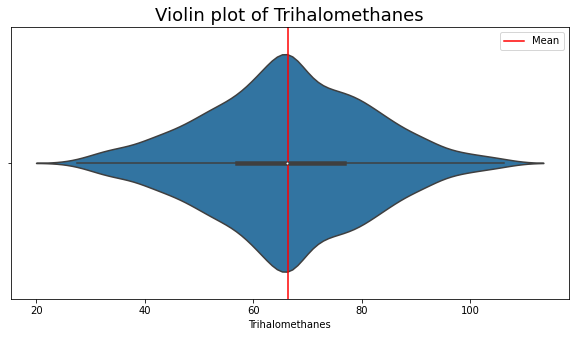

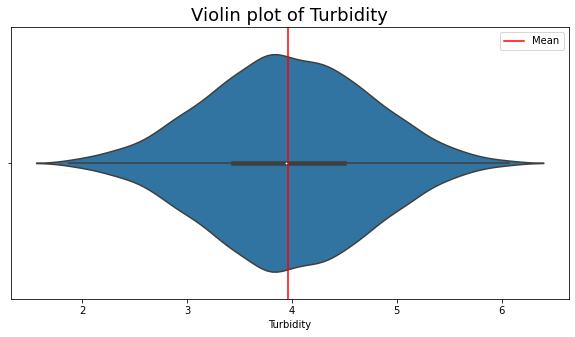

In [90]:
# Create voilin plot
for feature in x:
  plt.figure(figsize=(10, 5))
  plt.title('Violin plot of {}'.format(feature), fontsize=18)
  sns.violinplot(x=feature, data=df)
  plt.axvline(df[feature].mean(), color='r', label="Mean")
  plt.legend()
  plt.show()

# Try raincloud if data to much hindered
<img src="https://i1.wp.com/www.business-science.io/assets/2021-07-22-ggdist-raincloud-plots/raincloud_plot.jpg?w=584&ssl=1" />

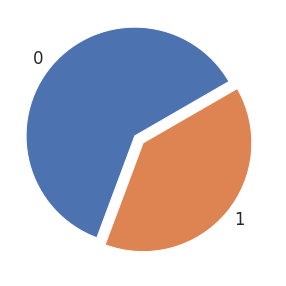

In [102]:
# Create pie plot for potability
plt.figure(figsize=(12, 5))
plt.pie(y.value_counts(), explode=[0.1, 0], labels=y.value_counts().index, startangle=30)
plt.show()

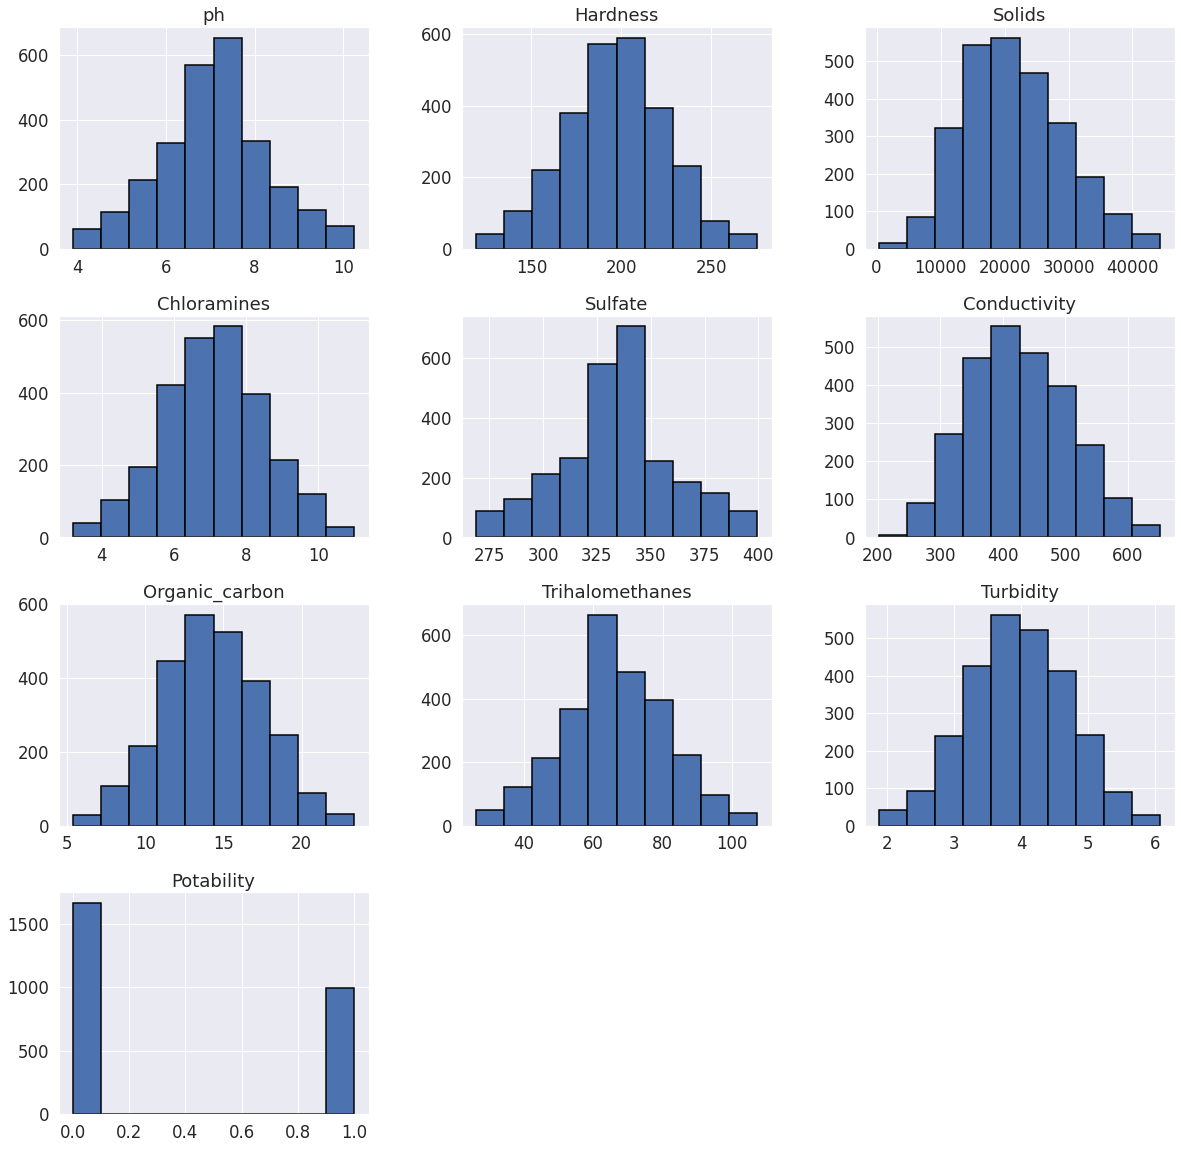

In [99]:
# Create hist plot for all feautures
sns.set(font_scale=1.5)
df.hist(edgecolor='black', linewidth=1.5, figsize=(20, 20))
plt.show()